In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# def radarPlot(labels, stats, title =''):
#     stats= stats
#     labels = labels
#     angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
#     # close the plot
#     stats=np.concatenate((stats,[stats[0]]))
#     angles=np.concatenate((angles,[angles[0]]))

#     fig= plt.figure()
#     ax = fig.add_subplot(111, polar=True)
#     ax.plot(angles, stats, 'o-', linewidth=2)
#     ax.fill(angles, stats, alpha=0.25)
#     ax.set_thetagrids(angles * 180/np.pi, labels)
#     ax.set_title(title)
#     ax.grid(True)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def radarPlot(labels, stats, title ='', color = 'blue'):
    stats= stats
    labels = labels
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    fig= plt.figure()
    ax = fig.add_subplot(111, polar=True)
    # ref: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
    ax.plot(angles, stats, 'o-', linewidth=1, color= color, alpha = 0.5)
    ax.fill(angles, stats, alpha=0.25, color= color)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title(title)
    ax.grid(True)


Here's MKBHD's Overall Personality Traits: 

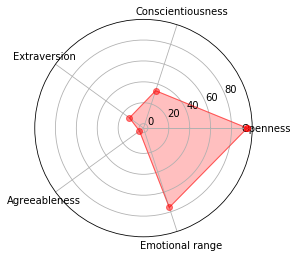

In [2]:


import json
import pandas as pd

data = json.load(open('input/MKBHD.json'))

# plot Top 5 Personalities
personalities = data['personality']
name = []
per = []
for trait in personalities:
    name.append(trait['name'])
    per.append(trait['percentile'] * 100)
    
radarPlot(labels= name, stats= per, color = 'red')


For each Personality, there are sub traits. So altogether 5 plots for each of the categories above ^

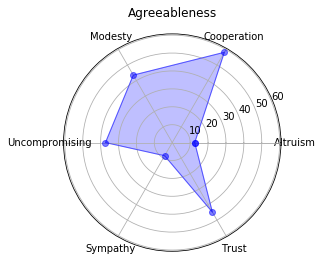

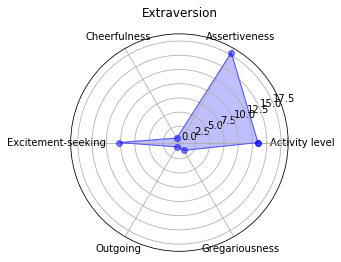

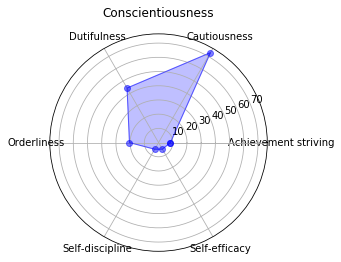

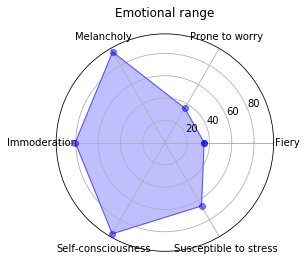

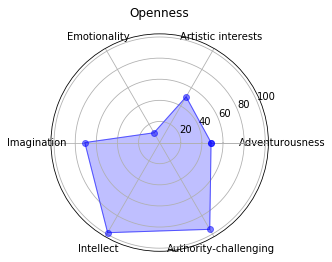

In [3]:
import json
import pandas as pd

data = json.load(open('input/MKBHD.json'))

def processSubCategory(big5_sub_category):
    for personalities in data['personality']:
        if (personalities['trait_id'] == big5_sub_category):
            name = []
            per = []
            for child_trait in personalities['children']:
                    name.append(child_trait['name'])
                    per.append(child_trait['percentile'] * 100)
            
            radarPlot(labels= name, stats= per, title= personalities['name'])
        
#top 5 personality
trait_ids = ['big5_agreeableness', 'big5_extraversion', 'big5_conscientiousness',
            'big5_neuroticism','big5_openness']
for x in trait_ids:
    processSubCategory(x)
